# sk-learn import

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# For data manipulation

In [37]:
import pandas as pd

import numpy as np

# To plot

In [38]:
import matplotlib.pyplot as plt

import seaborn

# sql import

In [39]:
import psycopg2
import datetime


# Load dataset Read sqlite query results into a pandas DataFrame

In [40]:
### Database connection

conn_string = "host='localhost' dbname='stockmarket' user='postgres' password='123456'"
conn = psycopg2.connect(conn_string)

## Read dataset

df = pd.read_sql_query(
    '''select i.date ,i.open ,i.high ,i.low ,i.close ,i.adj_close ,i.volume ,c.name
    from information i 
    join company c
    on i.company_id=c.id
    where company_id = {}'''.format(3)  , conn, index_col='date')
df.index = pd.to_datetime(df.index)


# Verify that result of SQL query is stored in the dataframe


In [41]:
print(df.head())

                open      high       low     close  adj_close      volume  \
date                                                                        
1986-03-12  0.444196  0.448661  0.441964  0.441964   0.020108  21420000.0   
1986-03-13  0.441964  0.446429  0.435268  0.441964   0.020108  28991200.0   
1986-03-14  0.441964  0.468750  0.441964  0.466518   0.021225  96213600.0   
1986-03-17  0.464286  0.464286  0.453125  0.464286   0.021123  29680000.0   
1986-03-18  0.464286  0.486607  0.462054  0.479911   0.021834  62339200.0   

            name  
date              
1986-03-12  AAPL  
1986-03-13  AAPL  
1986-03-14  AAPL  
1986-03-17  AAPL  
1986-03-18  AAPL  


## adding  features

In [42]:
conn.close()

df= df.dropna()

df['open-close'] = df.open - df.close

df['high-low'] = df.high - df.low

# Organize our data and select the target values

In [43]:
feature_cols = ['open','high','low','close','adj_close','volume','open-close','high-low']

x = df[feature_cols]

y = y = np.where(df['close'].shift(-1) > df['close'], 1, -1)

print(x.head(),'\n',y[1:5])

                open      high       low     close  adj_close      volume  \
date                                                                        
1986-03-12  0.444196  0.448661  0.441964  0.441964   0.020108  21420000.0   
1986-03-13  0.441964  0.446429  0.435268  0.441964   0.020108  28991200.0   
1986-03-14  0.441964  0.468750  0.441964  0.466518   0.021225  96213600.0   
1986-03-17  0.464286  0.464286  0.453125  0.464286   0.021123  29680000.0   
1986-03-18  0.464286  0.486607  0.462054  0.479911   0.021834  62339200.0   

            open-close  high-low  
date                              
1986-03-12    0.002232  0.006697  
1986-03-13    0.000000  0.011161  
1986-03-14   -0.024554  0.026786  
1986-03-17    0.000000  0.011161  
1986-03-18   -0.015625  0.024553   
 [ 1 -1  1 -1]


# Split our data

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=4)

# Initialize our classifier

In [45]:
gnb = GaussianNB()

# Train our classifier

In [46]:
model = gnb.fit(x_train,y_train)


# Make predictions

In [47]:
df['Predicted_Signal']= gnb.predict(x)

print(df['Predicted_Signal'].head())

date
1986-03-12   -1
1986-03-13   -1
1986-03-14   -1
1986-03-17   -1
1986-03-18   -1
Name: Predicted_Signal, dtype: int32


# Cumulative Returns

In [48]:
split = int(0.8*len(df))
df['Returns'] = np.log(df['close']/df['close'].shift(1))
Cumulative_Returns = df[split:]['Returns'].cumsum()*100
print('HEAD OF RETURNS','\n',df['Returns'].head(),'\n\n\n\n','TAIL OF RETURNS','\n',df['Returns'].tail(),'\n\n\n\n','TAIL OF CUMULATIVE RETURNS','\n',Cumulative_Returns.head(),'\n\n\n\n','HEAD OF CUMULATIVE RETURNS','\n',Cumulative_Returns.tail())

HEAD OF RETURNS 
 date
1986-03-12         NaN
1986-03-13    0.000000
1986-03-14    0.054068
1986-03-17   -0.004796
1986-03-18    0.033100
Name: Returns, dtype: float64 



 TAIL OF RETURNS 
 date
2018-03-07   -0.009326
2018-03-08    0.010853
2018-03-09    0.017035
2018-03-12    0.009621
2018-03-13   -0.009677
Name: Returns, dtype: float64 



 TAIL OF CUMULATIVE RETURNS 
 date
2011-10-12    0.473537
2011-10-13    2.013125
2011-10-14    5.281604
2011-10-17    4.804167
2011-10-18    5.338462
Name: Returns, dtype: float64 



 HEAD OF CUMULATIVE RETURNS 
 date
2018-03-07    111.867828
2018-03-08    112.953160
2018-03-09    114.656661
2018-03-12    115.618794
2018-03-13    114.651107
Name: Returns, dtype: float64


# Cumulative Startegy Returns

In [49]:
df['Strategy_Returns'] = df['Returns'] * df['Predicted_Signal'].shift(1)

Cum_Strategy_Returns = df[split:]['Strategy_Returns'].cumsum()*100

print('HEAD OF STRATEGY RETURNS','\n',df['Strategy_Returns'].head(),'\n\n\n\n','TAIL OF STRATEGY RETURNS','\n',df['Strategy_Returns'].tail(),'\n\n\n\n','TAIL OF CUMULATIVE STRATEGY RETURNS','\n',Cum_Strategy_Returns.head(),'\n\n\n\n','HEAD OF CUMULATIVE STRATEGY RETURNS','\n',Cum_Strategy_Returns.tail())

HEAD OF STRATEGY RETURNS 
 date
1986-03-12         NaN
1986-03-13   -0.000000
1986-03-14   -0.054068
1986-03-17    0.004796
1986-03-18   -0.033100
Name: Strategy_Returns, dtype: float64 



 TAIL OF STRATEGY RETURNS 
 date
2018-03-07    0.009326
2018-03-08   -0.010853
2018-03-09   -0.017035
2018-03-12   -0.009621
2018-03-13    0.009677
Name: Strategy_Returns, dtype: float64 



 TAIL OF CUMULATIVE STRATEGY RETURNS 
 date
2011-10-12    0.473537
2011-10-13    2.013125
2011-10-14   -1.255353
2011-10-17   -1.732789
2011-10-18   -1.198495
Name: Strategy_Returns, dtype: float64 



 HEAD OF CUMULATIVE STRATEGY RETURNS 
 date
2018-03-07    -97.138598
2018-03-08    -98.223931
2018-03-09    -99.927431
2018-03-12   -100.889565
2018-03-13    -99.921878
Name: Strategy_Returns, dtype: float64


# Plot the results to visualize the performance

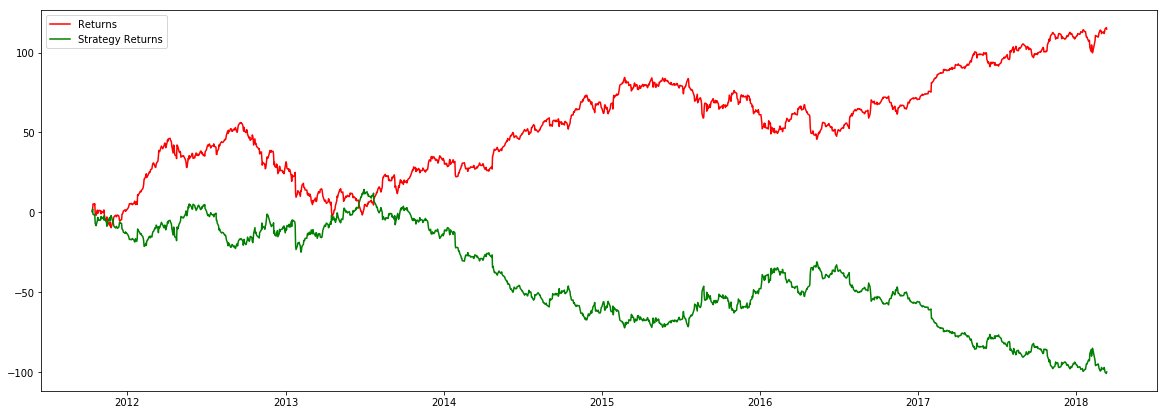

In [50]:
plt.figure(figsize=(20, 7))

plt.plot(Cumulative_Returns, color='r', label='Returns')

plt.plot(Cum_Strategy_Returns, color='g', label='Strategy Returns')

plt.legend()

plt.show()

# calculate sharpe ratio



### The Sharpe ratio is the return earned in excess of the market return per unit of volatility.First, we will calculate the standard deviation of the cumulative returns,and use it further to calculate the Sharpe ratio

In [51]:
std = Cum_Strategy_Returns.std()

sharpe = (Cum_Strategy_Returns-Cumulative_Returns)/std

sharpe = sharpe.mean()

print('sharpe ratio: %.2f' % sharpe)

print(df.head())

sharpe ratio: -3.21
                open      high       low     close  adj_close      volume  \
date                                                                        
1986-03-12  0.444196  0.448661  0.441964  0.441964   0.020108  21420000.0   
1986-03-13  0.441964  0.446429  0.435268  0.441964   0.020108  28991200.0   
1986-03-14  0.441964  0.468750  0.441964  0.466518   0.021225  96213600.0   
1986-03-17  0.464286  0.464286  0.453125  0.464286   0.021123  29680000.0   
1986-03-18  0.464286  0.486607  0.462054  0.479911   0.021834  62339200.0   

            name  open-close  high-low  Predicted_Signal   Returns  \
date                                                                 
1986-03-12  AAPL    0.002232  0.006697                -1       NaN   
1986-03-13  AAPL    0.000000  0.011161                -1  0.000000   
1986-03-14  AAPL   -0.024554  0.026786                -1  0.054068   
1986-03-17  AAPL    0.000000  0.011161                -1 -0.004796   
1986-03-18  AAPL   -